<a href="https://colab.research.google.com/github/Jihyeon0928/hello-world/blob/master/try_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

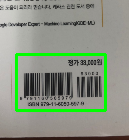

In [7]:
#이미지 로드

import numpy as np 
import cv2
import matplotlib.pyplot as plt

#from google.colab.patches import cv2_imshow


image = cv2.imread('ISBN.PNG')
image = cv2.resize(image,None,fx=0.3, fy=0.3)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

 
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)


blurred = cv2.GaussianBlur(gradient, (9,9),0)
(_, thresh) = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)



closed = cv2.erode(thresh, None, iterations = 4)
closed = cv2.dilate(thresh, None, iterations = 4)


(_, cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
 

cv2.drawContours(image, [box], -1, (0, 255, 0), 2)

#cv2_imshow(gradient)
#cv2_imshow(blurred)
#cv2_imshow(thresh)
#cv2_imshow(closed)

cv2_imshow(image)

In [13]:
image.shape

(140, 129, 3)

In [5]:
#꼭지점 정보 갖고 오기_pyzbar쓰는.ver
'''
import pyzbar.pyzbar as pyzbar

decoded = pyzbar.decode(image)
#decoded

for d in decoded:
  print(d.data.decode('utf-8'))
  print(d.type)

  cv2.rectangle(image,(d.rect[0],d.rect[1]),(d.rect[0],d.rect[2]),(d.rect[1],d.rect[3]),(0,0,255),2)

  plt.imshow(image)
  '''

AttributeError: ignored

In [17]:
#꼭지점 정보 갖고 오기_perspective transformation

#기존점 좌상 - 좌하 - 우상 -우하 --> 좌표값 가져오는 거 고민하기!
pts1 = np.float32([[60,20],[60,120],[20,20],[120,120]])
#이동점
pts2 = np.float32([[10,10],[10,100],[100,10],[100,100]])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(type(M))
print(M)

dst = cv2.warpPerspective(img, M, (110,110))

plt.subplot(121),plt.imshow(image),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('perspective transformed')
#plt.show()

#위 코드로 만든 이미지 dst로 다시 저장하기
cv2.imwrite('/scaling.jpg', dst)
cv2.imshow('perspective transformed', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
[[-1.50000000e+00 -1.66666667e-01  1.00000000e+02]
 [-2.36847579e-16 -1.06666667e+00  2.80000000e+01]
 [-3.15796771e-18 -1.66666667e-02  1.00000000e+00]]


NameError: ignored

In [18]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,519 kB/s)
debconf: unable to initi

In [0]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
 import cv2

In [24]:
image_path_in_colab='scailing.jpg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

© £20] S22} VSLICL APA Be SA SOL

agle Developer Expert ~ Machine Leaming(GDE-ML)

 

 

 

oo
Mill ll Tl i|
9791160505 il

ISBN 979-11- MI


In [22]:
import re
text = extractedInformation
line = re.sub('[-,\n]','', text)
print(line)

© £20] S22} VSLICL APA Be SA SOLagle Developer Expert ~ Machine Leaming(GDEML)   ooMill ll Tl i|9791160505 ilISBN 97911 MI


In [23]:
n=line.find('N')
isbn_no=line[n+2:n+15]

#for line in line:
#    item = line.split(" ")
    #isbn_no = item[item.index("ISBN")+1]

print(isbn_no)

97911 MI
